# <h1>Time Series Analysis and Forecast on Irish Daily Covid Case Infection Rates</h1>

<h3>Nadia Abouelleil</h3>

<h2>Confirmed Covid Deaths Forecast</h2>

In [230]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime
import warnings
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm
warnings.filterwarnings('ignore')

In [231]:
data=pd.read_csv("CovidDeaths.csv")
data.shape

(178, 2)

In [232]:
data['Date']=pd.to_datetime(data['Date'], infer_datetime_format=True)
data=data.set_index(['Date'])

print(data.head())
print(data.tail())

            ConfirmedCovidDeaths
Date                            
2020-02-29                     0
2020-03-03                     0
2020-03-04                     0
2020-03-05                     0
2020-03-06                     0
            ConfirmedCovidDeaths
Date                            
2020-08-22                     2
2020-08-23                     0
2020-08-24                     0
2020-08-25                     0
2020-08-26                     0


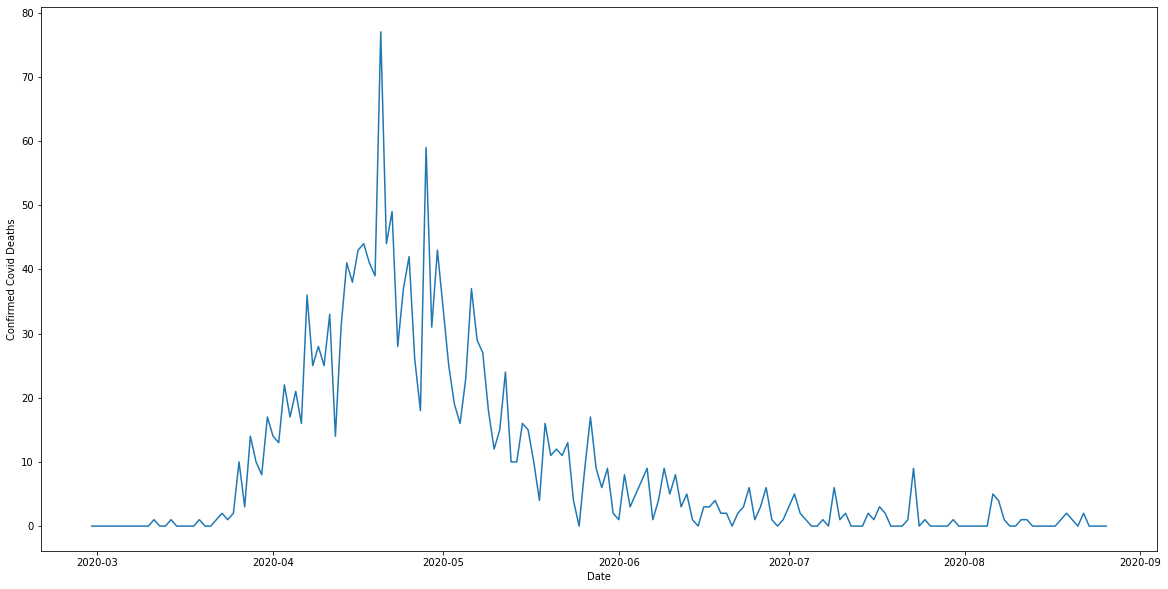

In [235]:
plt.figure(figsize=(20,10))
plt.xlabel("Date")
plt.ylabel("Confirmed Covid Deaths")
plt.plot(data)

In [234]:
rolmean=data.rolling(window=7).mean()
rolstd=data.rolling(window=7).std()
print(rolmean.head(15))
print(rolstd.head(15))

            ConfirmedCovidDeaths
Date                            
2020-02-29                   NaN
2020-03-03                   NaN
2020-03-04                   NaN
2020-03-05                   NaN
2020-03-06                   NaN
2020-03-07                   NaN
2020-03-08              0.000000
2020-03-09              0.000000
2020-03-10              0.000000
2020-03-11              0.142857
2020-03-12              0.142857
2020-03-13              0.142857
2020-03-14              0.285714
2020-03-15              0.285714
2020-03-16              0.285714
            ConfirmedCovidDeaths
Date                            
2020-02-29                   NaN
2020-03-03                   NaN
2020-03-04                   NaN
2020-03-05                   NaN
2020-03-06                   NaN
2020-03-07                   NaN
2020-03-08              0.000000
2020-03-09              0.000000
2020-03-10              0.000000
2020-03-11              0.377964
2020-03-12              0.377964
2020-03-13

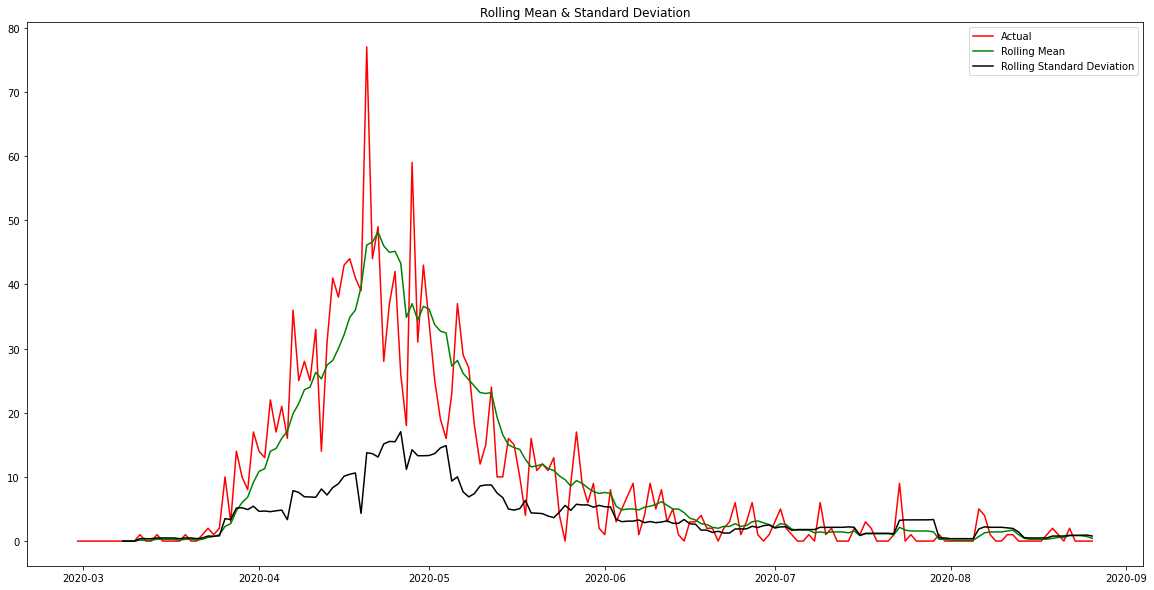

In [204]:
plt.figure(figsize=(20,10))
actual=plt.plot(data, color='red', label='Actual')
mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
std_6=plt.plot(rolstd, color='black', label='Rolling Standard Deviation')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [205]:
from statsmodels.tsa.stattools import adfuller
print('Dickey-Fuller Test: ')
dftest=adfuller(data['ConfirmedCovidDeaths'], autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Dickey-Fuller Test: 
Test Statistic           -1.824912
p-value                   0.368165
Lags Used                11.000000
No. of Obs              166.000000
Critical Value (1%)      -3.470370
Critical Value (5%)      -2.879114
Critical Value (10%)     -2.576139
dtype: float64


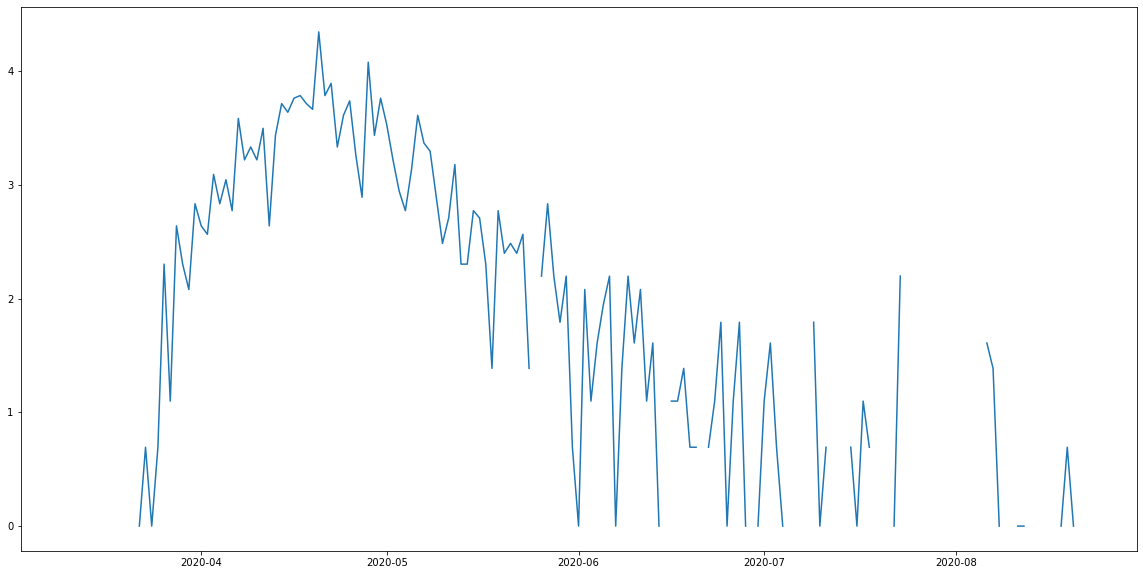

In [206]:
plt.figure(figsize=(20,10))
data_log=np.log(data)
plt.plot(data_log)

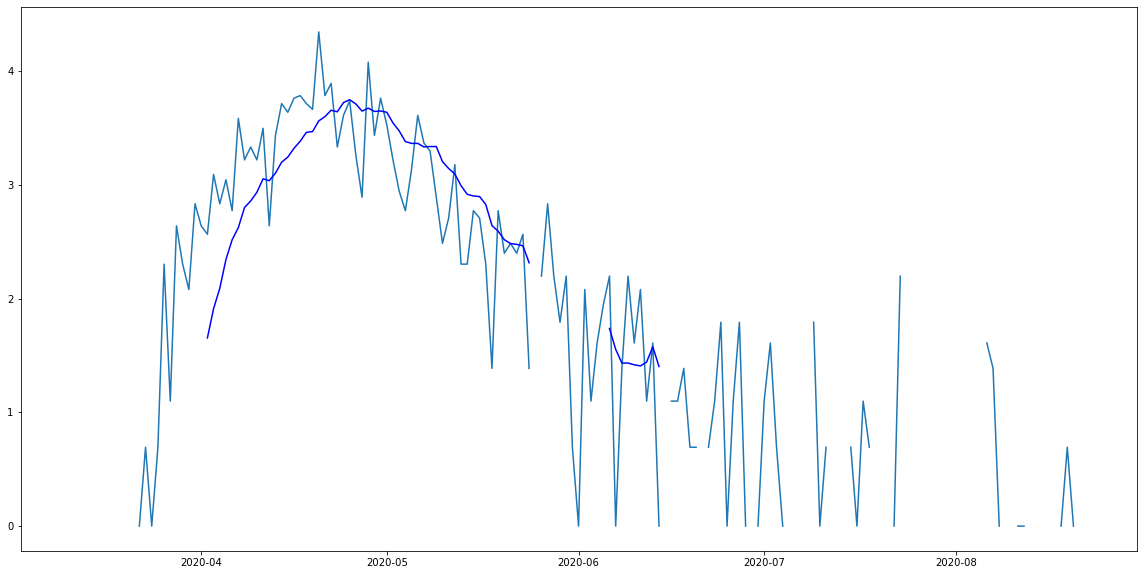

In [207]:
plt.figure(figsize=(20,10))
MAvg=data_log.rolling(window=12).mean()
MStd=data_log.rolling(window=12).std()
plt.plot(data_log)
plt.plot(MAvg, color='blue')

In [208]:
data_log_diff=data_log-MAvg
data_log_diff.head(12)

,ConfirmedCovidDeaths
Date,
2020-02-29,NaN
2020-03-03,NaN
2020-03-04,NaN
2020-03-05,NaN
2020-03-06,NaN
2020-03-07,NaN
2020-03-08,NaN
2020-03-09,NaN
2020-03-10,NaN


In [209]:
data_log_diff=data_log_diff.dropna()
data_log_diff.head()

,ConfirmedCovidDeaths
Date,
2020-04-02,0.911133
2020-04-03,1.179639
2020-04-04,0.743471
2020-04-05,0.701070
2020-04-06,0.255850


In [210]:
def stationarity(timeseries):
    
    rolmean=timeseries.rolling(window=12).mean()
    rolstd=timeseries.rolling(window=12).std()
    
    plt.figure(figsize=(20,10))
    actual=plt.plot(timeseries, color='red', label='Actual')
    mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
    std_6=plt.plot(rolstd, color='black', label='Rolling Standard Deviation')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print('Dickey-Fuller Test: ')
    dftest=adfuller(timeseries['ConfirmedCovidDeaths'], autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

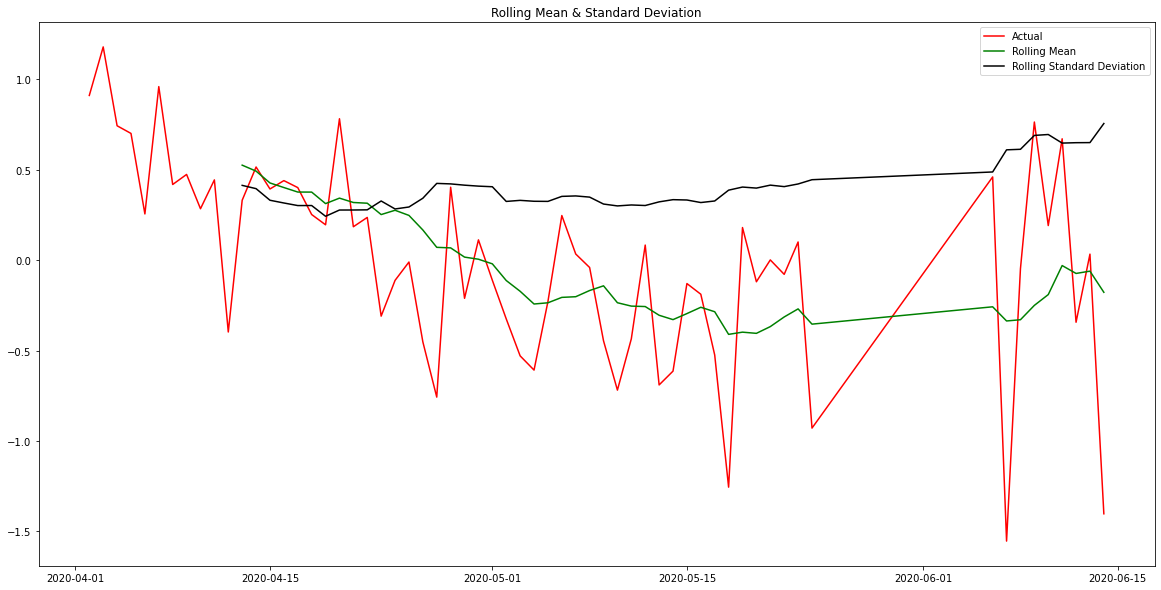

Dickey-Fuller Test: 
Test Statistic          -3.401381
p-value                  0.010912
Lags Used                1.000000
No. of Obs              60.000000
Critical Value (1%)     -3.544369
Critical Value (5%)     -2.911073
Critical Value (10%)    -2.593190
dtype: float64


In [211]:
stationarity(data_log_diff)

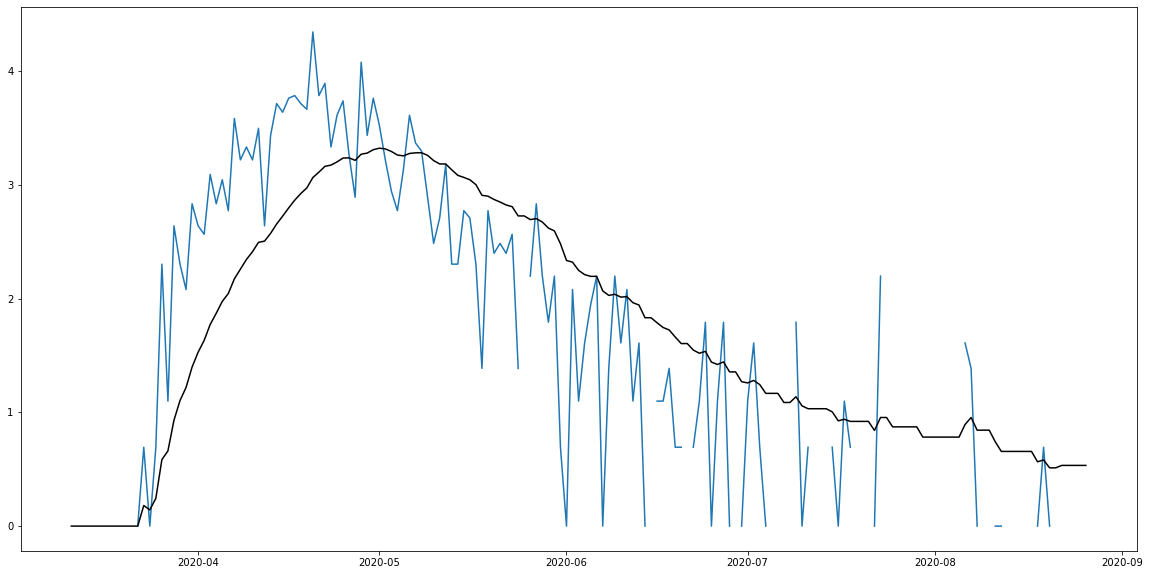

In [212]:
plt.figure(figsize=(20,10))
exp_data=data_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(data_log)
plt.plot(exp_data, color='black')

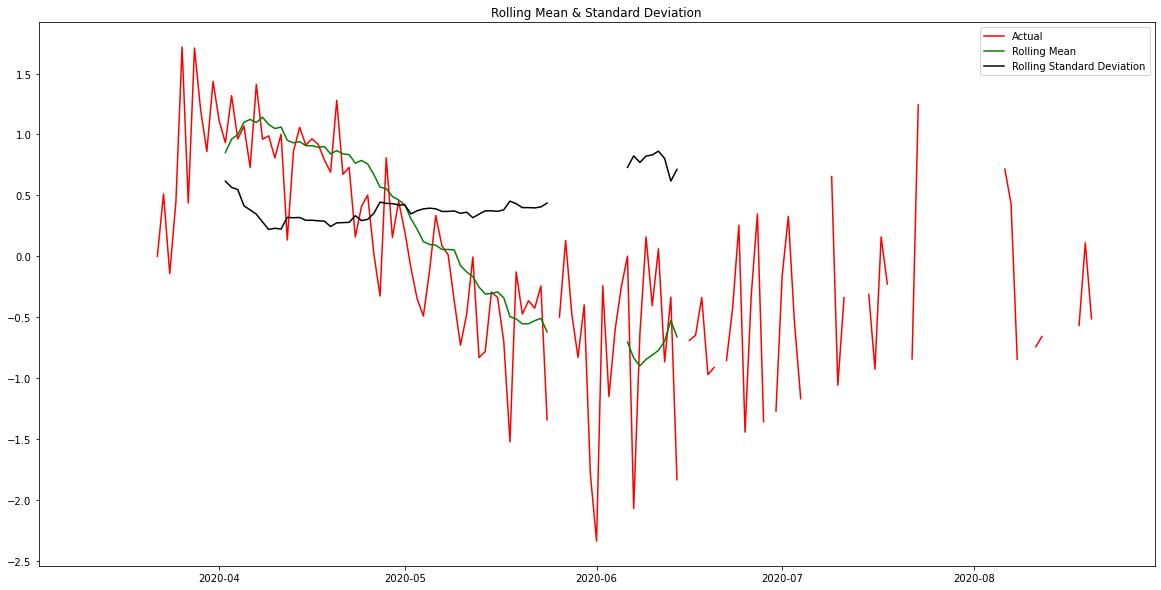

Dickey-Fuller Test: 


MissingDataError: exog contains inf or nans

In [213]:
exp_data_diff=data_log-exp_data
stationarity(exp_data_diff)

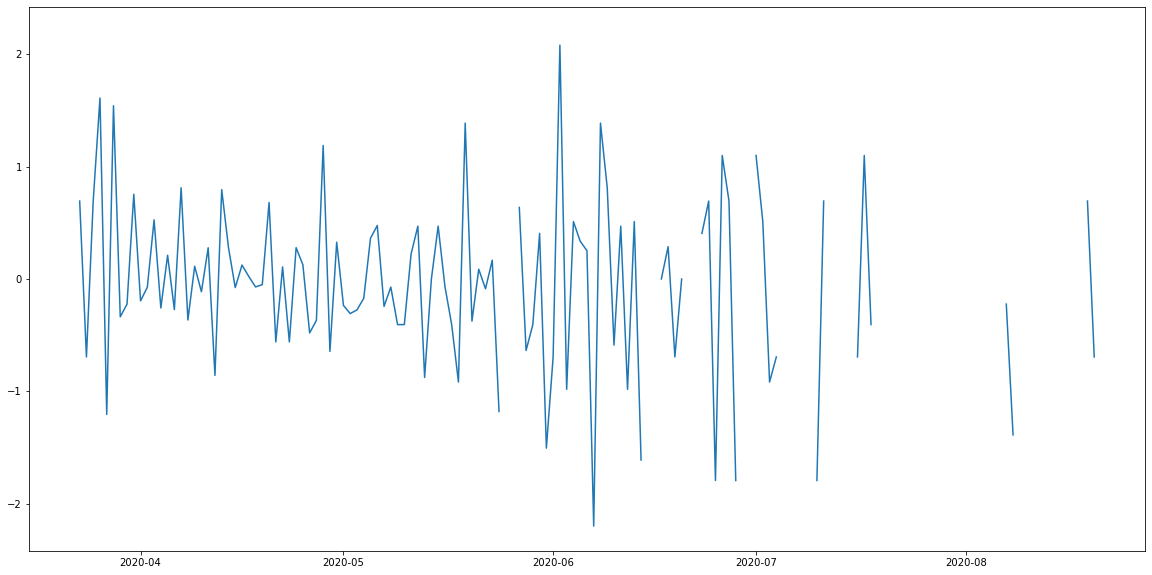

In [214]:
plt.figure(figsize=(20,10))
data_shift=data_log-data_log.shift()
plt.plot(data_shift)

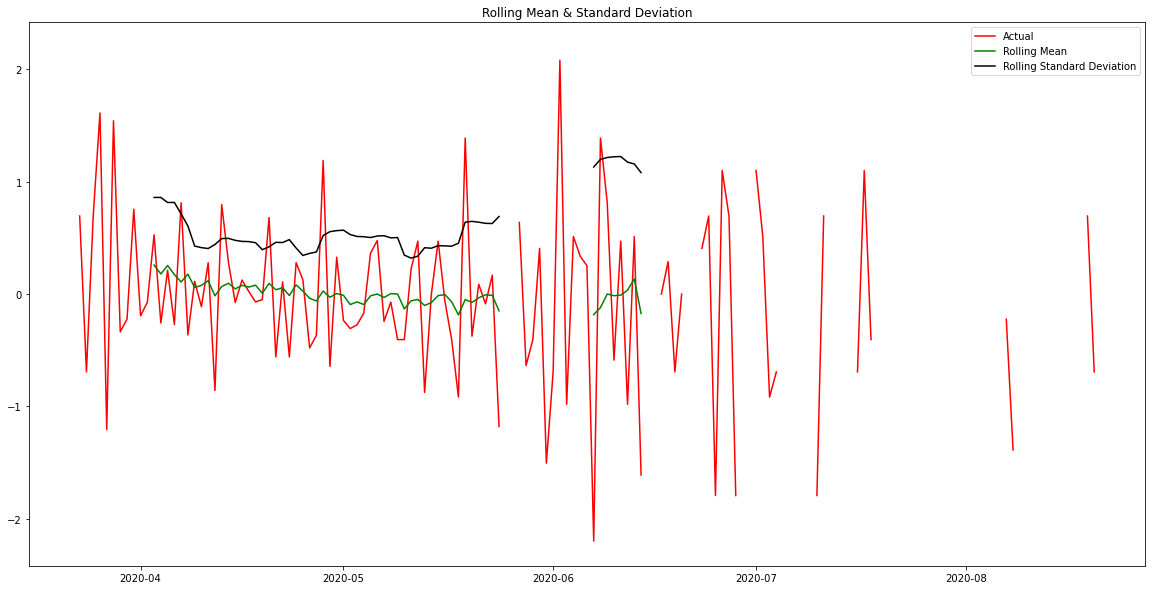

Dickey-Fuller Test: 


MissingDataError: exog contains inf or nans

In [227]:
data_shift=data_shift.dropna()
stationarity(data_shift)

In [228]:
from statsmodels.tsa.seasonal import seasonal_decompose

if not np.all(np.isfinite(x)):
    raise ValueError("This function does not handle missing values")
    if model.startswith('m'):
        if np.any(x <= 0):
            
            decomp=seasonal_decompose(data_log.values, freq=1)

            trend=decomp.trend
            seasonal=decomp.seasonal
            residual=decomp.resid
            
            plt.subplot(411)
            plt.plot(data_log, label='Original')
            plt.legend(loc='best')
            plt.subplot(412)
            plt.plot(trend, label='Trend')
            plt.legend(loc='best')
            plt.subplot(413)
            plt.plot(seasonal, label='Seasonality')
            plt.legend(loc='best')
            plt.subplot(414)
            plt.plot(residual, label='Residuals')
            plt.legend(loc='best')
            plt.tight_layout()

ValueError: could not broadcast input array from shape (120,2) into shape (120)

In [218]:
decomp_data=residual
decomp_data=decomp_data.dropna()
stationarity(decomp_data)

AttributeError: 'numpy.ndarray' object has no attribute 'dropna'

In [219]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf=acf(data_shift, nlags=20)
lag_pacf=pacf(data_shift, nlags=20, method='ols')

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.title('Autocorrelation Function')

LinAlgError: SVD did not converge in Linear Least Squares

In [220]:
from statsmodels.tsa.arima_model import ARIMA

plt.figure(figsize=(20,10))
model=ARIMA(data_log, order=(2,1,2))
results=model.fit(disp=-1)
plt.plot(data_shift)
plt.plot(results.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results.fittedvalues-data_shift['ConfirmedCovidDeaths'])**2))
print('plotting ARIMA model')

MissingDataError: exog contains inf or nans

<Figure size 1440x720 with 0 Axes>

In [193]:
predictions=pd.Series(results.fittedvalues, copy=True)
print(predictions.head())

Date
2020-03-03    0.057911
2020-03-04    0.086850
2020-03-05   -0.761696
2020-03-06   -0.696024
2020-03-07    0.005936
dtype: float64


In [194]:
predictions_cum_sum=predictions.cumsum()
print(predictions_cum_sum.head())

Date
2020-03-03    0.057911
2020-03-04    0.144761
2020-03-05   -0.616934
2020-03-06   -1.312958
2020-03-07   -1.307023
dtype: float64


In [196]:
predictions_log=pd.Series(data_log['ConfirmedCovidDeaths'].iloc[0], index=data_log.index)
predictions_log=predictions_log.add(predictions_cum_sum,fill_value=0)
predictions_log.head()

predictions_log=pd.Series(data_log['ConfirmedCovidDeaths'].iloc[0], index=data_log.index)
predictions_log=predictions_log.add(predictions_cum_sum,fill_value=0)
predictions_log.head()

Date
2020-02-29    0.000000
2020-03-03    0.057911
2020-03-04    0.144761
2020-03-05   -0.616934
2020-03-06   -1.312958
dtype: float64

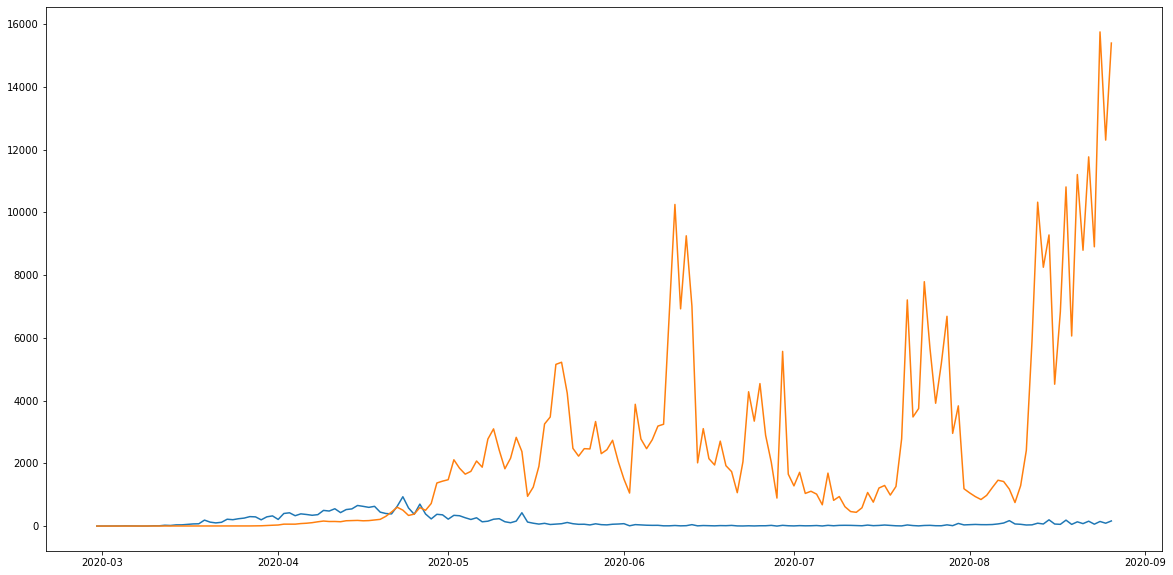

In [197]:
predictions_ARIMA=np.exp(predictions_log)
plt.figure(figsize=(20,10))
plt.plot(data)
plt.plot(predictions_ARIMA)

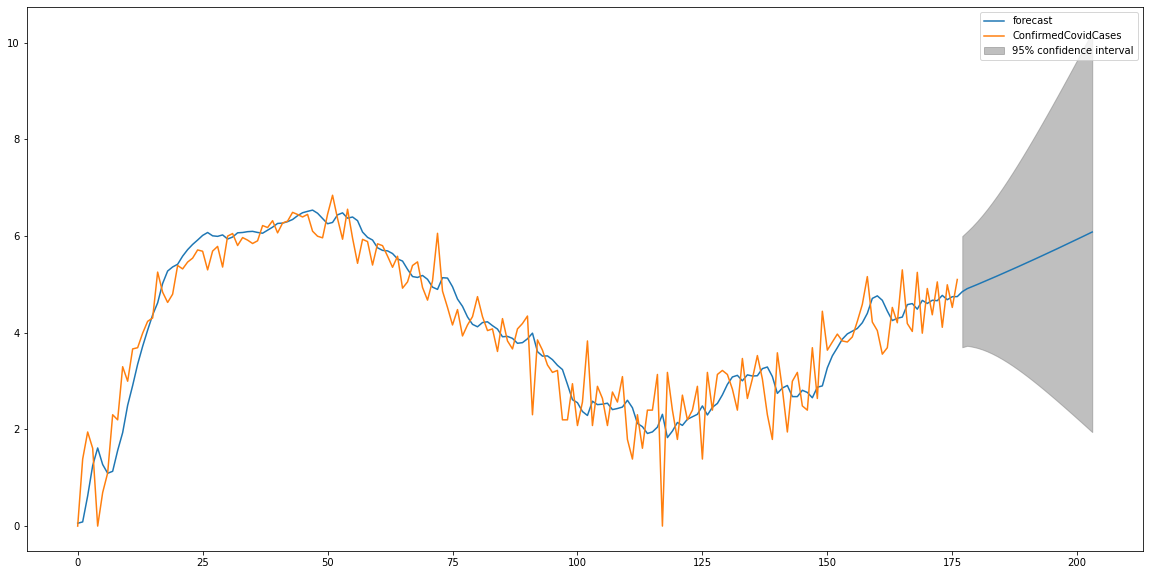

In [198]:
rcParams['figure.figsize']=20,10
results.plot_predict(1,204)
x=results.forecast(steps=120)

In [199]:
results.forecast(steps=120)

(array([ 4.84759362,  4.91061199,  4.95220386,  4.995702  ,  5.03947769,
         5.08363305,  5.12815047,  5.17302096,  5.21823515,  5.26378401,
         5.30965869,  5.35585063,  5.40235145,  5.44915302,  5.4962474 ,
         5.54362688,  5.59128395,  5.63921129,  5.68740177,  5.73584847,
         5.78454461,  5.83348365,  5.88265916,  5.93206491,  5.98169485,
         6.03154306,  6.08160378,  6.13187142,  6.18234052,  6.23300577,
         6.283862  ,  6.33490418,  6.38612741,  6.43752691,  6.48909804,
         6.54083628,  6.59273722,  6.64479657,  6.69701015,  6.74937391,
         6.80188389,  6.85453622,  6.90732716,  6.96025305,  7.01331034,
         7.06649557,  7.11980536,  7.17323642,  7.22678557,  7.28044969,
         7.33422575,  7.3881108 ,  7.44210197,  7.49619645,  7.55039153,
         7.60468456,  7.65907295,  7.71355419,  7.76812583,  7.8227855 ,
         7.87753086,  7.93235966,  7.98726971,  8.04225886,  8.09732502,
         8.15246617,  8.20768033,  8.26296557,  8.3